In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import datetime as dt
import json

from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from urllib.request import urlopen
from py2neo import Graph
from py2neo import Node
from py2neo import Relationship
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from functools import reduce

from Python_files import correlation_graph
from Python_files import my_regression 
from Python_files import Outlier_detection 

# Data Loading

## Loading the merged data

In [2]:
counties_features=pd.read_csv("PreprocessedData/mergedata.csv",dtype={'fips':'string'})

## Information states

In [3]:
states=counties_features[['state','state abbreviation','state fips','state population']].drop_duplicates()

## Weekly data counties

In [4]:
week_merge=pd.read_csv("PreprocessedData/week_merge.csv",dtype={'fips':'string'})

## Counties data

###  Counties 2020

In [5]:
df_counties_2020 = pd.read_csv('RawData/us-counties-2020.csv',parse_dates=['date'])
df_counties_2020.head(15)

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,USA-17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0
5,2020-01-25,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
6,2020-01-25,USA-17031,Cook,Illinois,0,0.14,0.00,0,0.0,0.0
7,2020-01-25,USA-06059,Orange,California,1,0.14,0.00,0,0.0,0.0
8,2020-01-26,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
9,2020-01-26,USA-17031,Cook,Illinois,0,0.14,0.00,0,0.0,0.0


### Counties 2021

In [6]:
df_counties_2021 = pd.read_csv('RawData/us-counties-2021.csv',parse_dates=['date'])
df_counties_2021.head(15)

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2021-01-01,USA-72999,Unknown,Puerto Rico,-17,35.29,NaN,0,0.0,NaN
1,2021-01-01,USA-72153,Yauco,Puerto Rico,4,3.00,8.86,0,0.0,0.0
2,2021-01-01,USA-72151,Yabucoa,Puerto Rico,10,7.29,22.66,0,0.0,0.0
3,2021-01-01,USA-72149,Villalba,Puerto Rico,8,2.43,11.31,0,0.0,0.0
4,2021-01-01,USA-72147,Vieques,Puerto Rico,0,1.00,11.96,0,0.0,0.0
5,2021-01-01,USA-72145,Vega Baja,Puerto Rico,23,14.43,28.75,0,0.0,0.0
6,2021-01-01,USA-72143,Vega Alta,Puerto Rico,11,6.86,19.15,0,0.0,0.0
7,2021-01-01,USA-72141,Utuado,Puerto Rico,5,5.13,18.61,0,0.0,0.0
8,2021-01-01,USA-72139,Trujillo Alto,Puerto Rico,22,13.57,21.29,0,0.0,0.0
9,2021-01-01,USA-72137,Toa Baja,Puerto Rico,14,13.57,18.19,0,0.0,0.0


### Counties 2022

In [7]:
df_counties_2022 = pd.read_csv('Rawdata/us-counties-2022.csv',parse_dates=['date'])
df_counties_2022.head(15)

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2022-01-01,USA-72999,Unknown,Puerto Rico,0,328.14,NaN,0,0.0,NaN
1,2022-01-01,USA-72153,Yauco,Puerto Rico,0,66.50,196.40,0,0.0,0.0
2,2022-01-01,USA-72151,Yabucoa,Puerto Rico,0,63.13,196.30,0,0.0,0.0
3,2022-01-01,USA-72149,Villalba,Puerto Rico,0,47.50,221.18,0,0.0,0.0
4,2022-01-01,USA-72147,Vieques,Puerto Rico,0,7.63,91.16,0,0.0,0.0
5,2022-01-01,USA-72145,Vega Baja,Puerto Rico,0,152.50,303.88,0,0.0,0.0
6,2022-01-01,USA-72143,Vega Alta,Puerto Rico,0,70.50,196.89,0,0.0,0.0
7,2022-01-01,USA-72141,Utuado,Puerto Rico,0,26.63,96.66,0,0.0,0.0
8,2022-01-01,USA-72139,Trujillo Alto,Puerto Rico,0,169.75,266.29,0,0.0,0.0
9,2022-01-01,USA-72137,Toa Baja,Puerto Rico,0,185.50,248.58,0,0.0,0.0


### Merging the counties data

In [8]:
df_counties=pd.concat([df_counties_2020, df_counties_2021,df_counties_2022],ignore_index=True)
df_counties.head(15)

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,USA-17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0
5,2020-01-25,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
6,2020-01-25,USA-17031,Cook,Illinois,0,0.14,0.00,0,0.0,0.0
7,2020-01-25,USA-06059,Orange,California,1,0.14,0.00,0,0.0,0.0
8,2020-01-26,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
9,2020-01-26,USA-17031,Cook,Illinois,0,0.14,0.00,0,0.0,0.0


### Data preparation

In [9]:
df_counties = df_counties[df_counties.county != "Unknown"]
df_counties['fips']=df_counties['geoid'].str[-5:]

In [10]:
df_counties.isna().sum()

date                   0
geoid                  0
county                 0
state                  0
cases                  0
cases_avg              0
cases_avg_per_100k     0
deaths                 0
deaths_avg             0
deaths_avg_per_100k    0
fips                   0
dtype: int64

# Prepare neo4j datafiles

## Preparing graph based on correlations

We can try to study Covid 19 in the US as nodes and edges. The nodes are defined as the different states. The edges reflect whether the evolution of Covid 19 over time (starting from 2020-01-21 until 2022-04-11) is similar in the different states. Therefore, the rolling averages of the number of cases and number of deaths reported whitin the last 7 days are used. A correlation matrix is made to investigate whether the states are similar or not.

### Cases whole period

A graph is made based on correlations for the whole period. A csv file is made containing the nodes and edges and is stored into the folder Data_input_neo4j

In [11]:
list_cases=["cases","cases_avg"]

In [12]:
make_graph=correlation_graph.my_graph(df_counties,"whole_period",list_cases)
print(make_graph)

Makes nodes and edges based on the correlations between timeseries for each state


In [13]:
make_graph.fit_transform()

### Cases specific periods

Now, we can also make graphs for specific periods. The nodes are still the same, only the edges change. Therefore, the nodes file does not have to be recomputed. A csv file is made for the edges of every period and stored into the folder Data_input_neo4j.

In [14]:
period_1= [datetime(2020, 1, 21),datetime(2020,6,20)]
period_2=[datetime(2020, 6, 21),datetime(2020,12,20)]
period_3=[datetime(2020, 12, 21),datetime(2021,6,20)]
period_4=[datetime(2021, 6, 21),datetime(2021,12,20)]
period_5=[datetime(2021, 12, 21),datetime(2022,4,11)]
period=[period_1,period_2,period_3,period_4,period_5]

In [15]:
for a in range(5):
    df_date=df_counties[(period[a][0]<=df_counties['date'])&(df_counties['date']<=period[a][1])]
    make_graph_date=correlation_graph.my_graph(df_date,period[a][0].strftime("%b%Y"),list_cases)
    make_graph_date.fit_transform()

### Deaths whole period

A graph is made based on correlations for the whole period. A csv file is made containing the nodes and edges and is stored into the folder Data_input_neo4j

In [16]:
list_deaths=["deaths","deaths_avg"]

In [17]:
make_graph=correlation_graph.my_graph(df_counties,"whole_period",list_deaths)
make_graph.fit_transform()

### Deaths specific periods

Now, we can also make graphs for specific periods. The nodes are still the same, only the edges change. Therefore, the nodes file does not have to be recomputed. A csv file is made for the edges of every period and stored into the folder Data_input_neo4j.

In [18]:
for a in range(5):
    df_date=df_counties[(period[a][0]<=df_counties['date'])&(df_counties['date']<=period[a][1])]
    make_graph_date=correlation_graph.my_graph(df_date,period[a][0].strftime("%b%Y"),list_deaths)
    make_graph_date.fit_transform()

# Graph algorithms correlation graph

Connecting to the database and make sure it is empty. Furthermore, make sure that all datafiles that are in the folder Data_input_neo4j are copied into the input folder of your database.

In [19]:
graph = Graph(password= "xxx")

In [20]:
com=correlation_graph.my_algorithms(graph)

## Cases whole period

In [21]:
df_cases=com.fit_community("file:///nodes_states_cases.csv","file:///correlation_states_cases_whole_period.csv")
df_LB_cases=pd.merge(df_cases.explode("Places"),states.drop(columns=['state population']),
                     how='inner',left_on='Places',right_on='state').drop(columns=['Places'])
df_LB_cases['cluster']=df_LB_cases['cluster'].astype('string')

In [22]:
# Plot the state data in a map

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

fig = px.choropleth(df_LB_cases,
                        locations='state abbreviation',
                        color='cluster',
                        color_continuous_scale='spectral_r',
                        hover_name='state',
                        locationmode='USA-states',
                        scope='usa')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_image(file='Figures/States_whole_cases.png', format='png')

## Cases at multiple times

After performing community detection, we save the communities into a dataframe. Afterwards, this dataframe is merged with the state fips.

In [23]:
for a in range(1,6):
    globals()['df_cases_%s' % a]=com.fit_community("file:///nodes_states_cases.csv",
                                                   "file:///correlation_states_cases_"+period[a-1][0].strftime("%b%Y")+".csv")
    globals()['df_LB_cases_%s' % a]=pd.merge(globals()['df_cases_%s' % a].explode("Places"),
                                             states.drop(columns=['state population']),how='inner',
                                             left_on='Places',right_on='state').drop(columns=['Places'])
    globals()['df_LB_cases_%s' % a]['cluster']=globals()['df_LB_cases_%s' % a]['cluster'].astype('string')

Now, the communities can be plotted on the graph of the USA

In [24]:
# Plot the state data in a map
for a in range(1,6):
    print("Busy making plot for period {} out of 5".format(a))
    fig = px.choropleth(globals()['df_LB_cases_%s' % a],
                        locations='state abbreviation',
                        color='cluster',
                        color_continuous_scale='spectral_r',
                        hover_name='state',
                        locationmode='USA-states',
                        scope='usa')
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.write_image(file='Figures/Community_cases_'+str(a)+'.png', format='png')

Busy making plot for period 1 out of 5
Busy making plot for period 2 out of 5
Busy making plot for period 3 out of 5
Busy making plot for period 4 out of 5
Busy making plot for period 5 out of 5


## Deaths whole period

In [25]:
df_deaths=com.fit_community("file:///nodes_states_cases.csv","file:///correlation_states_deaths_whole_period.csv")
df_LB_deaths=pd.merge(df_deaths.explode("Places"),states.drop(columns=['state population']),
                      how='inner',left_on='Places',right_on='state').drop(columns=['Places'])
df_LB_deaths['cluster']=df_LB_deaths['cluster'].astype('string')

In [26]:
# Plot the state data in a map

fig = px.choropleth(df_LB_deaths,
                        locations='state abbreviation',
                        color='cluster',
                        color_continuous_scale='spectral_r',
                        hover_name='state',
                        locationmode='USA-states',
                        scope='usa')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_image(file='Figures/States_whole_deaths.png', format='png')

## Deaths at multiple times

After performing community detection, we save the communities into a dataframe. Afterwards, this dataframe is merged with the state fips. 

In [27]:
for a in range(1,6):
    globals()['df_deaths_%s' % a]=com.fit_community("file:///nodes_states_cases.csv",
                                                   "file:///correlation_states_deaths_"+period[a-1][0].strftime("%b%Y")+".csv")
    globals()['df_LB_deaths_%s' % a]=pd.merge(globals()['df_deaths_%s' % a].explode("Places"),
                                             states.drop(columns=['state population']),how='inner',
                                             left_on='Places',right_on='state').drop(columns=['Places'])
    globals()['df_LB_deaths_%s' % a]['cluster']=globals()['df_LB_deaths_%s' % a]['cluster'].astype('string')

In [28]:
# Plot the state data in a map
for a in range(1,6):
    print("Busy making plot for period {} out of 5".format(a))
    fig = px.choropleth(globals()['df_LB_deaths_%s' % a],
                        locations='state abbreviation',
                        color='cluster',
                        color_continuous_scale='spectral_r',
                        hover_name='state',
                        locationmode='USA-states',
                        scope='usa')
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.write_image(file='Figures/Community_deaths_'+str(a)+'.png', format='png')

Busy making plot for period 1 out of 5
Busy making plot for period 2 out of 5
Busy making plot for period 3 out of 5
Busy making plot for period 4 out of 5
Busy making plot for period 5 out of 5


# Clusters explanatory variables

We can now investigate whether there is a relation between some explanatory variables and the clusters we found.

## Vaccinations

To use the vaccination data, the data for the different periods in the counties_features dataframe is aggregated within a state and the number of vaccinated people is divided by the total population of the state.

In [29]:
features_clusters=counties_features.groupby(["state","state abbreviation","state population","Insured per state: uninsured",
                                           "PovertyRate",'Percent >65yrs per state',
                                           'degree centrality state'],as_index=False).agg({'Complete_all':'sum',
                                            "Complete_period1" :'sum',"Complete_period2":'sum',"Complete_period3":'sum',
                                            "Complete_period4":'sum',"Complete_period5":'sum'})

features_clusters.head(5)

,state,state abbreviation,state population,Insured per state: uninsured,PovertyRate,Percent >65yrs per state,degree centrality state,Complete_all,Complete_period1,Complete_period2,Complete_period3,Complete_period4,Complete_period5
0,Alabama,AL,4949697,0.097,0.1608,17.8,136606.0,1.375125e+06,0.0,0.0,5.611617e+05,1.767186e+06,2.240422e+06
1,Alaska,AK,720763,0.115,0.1067,13.1,10832.0,3.211398e+05,0.0,0.0,1.679743e+05,3.989618e+05,4.815736e+05
2,Arizona,AZ,7640796,0.111,0.1366,18.5,66736.0,2.723513e+06,0.0,0.0,1.212757e+06,3.529354e+06,4.201502e+06
3,Arkansas,AR,3042017,0.091,0.1631,17.7,89785.0,9.093193e+05,0.0,0.0,3.938021e+05,1.169155e+06,1.439506e+06
4,California,CA,39664128,0.078,0.1298,15.2,146679.0,1.687288e+07,0.0,0.0,6.951346e+06,2.212455e+07,2.657235e+07


In [30]:
features_clusters['Complete_all']=features_clusters['Complete_all']/features_clusters['state population']
for a in range(2,6):
    features_clusters['Complete_period'+str(a)]=features_clusters['Complete_period'+str(a)]/features_clusters['state population']
features_clusters['prop_age']=features_clusters['Percent >65yrs per state']/100
features_clusters.drop(columns=['state population','Percent >65yrs per state'],inplace=True)

Plotting the vaccination rate.

In [31]:
for a in range(2,6):
    print("Busy making plot for period {} out of 4".format(a-1))
    fig = px.choropleth(features_clusters,
                        locations='state abbreviation',
                        color='Complete_period'+str(a),
                        color_continuous_scale='spectral_r',
                        hover_name='state',
                        range_color=(0,1),
                        locationmode='USA-states',
                        scope='usa')
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.write_image(file='Figures/Vaccination_'+str(a)+'.png', format='png')

Busy making plot for period 1 out of 4
Busy making plot for period 2 out of 4
Busy making plot for period 3 out of 4
Busy making plot for period 4 out of 4


## Insurance, age and poverty rate

Health insurance, age and poverty rate are possible explanatory variables.

In [32]:
fig = px.choropleth(features_clusters,
                        locations='state abbreviation',
                        color='Insured per state: uninsured',
                        color_continuous_scale='spectral_r',
                        hover_name='state',
                        locationmode='USA-states',
                        scope='usa')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_image(file='Figures/Insurance.png', format='png')

In [33]:
fig = px.choropleth(features_clusters,
                     locations='state abbreviation',
                     color='prop_age',
                     color_continuous_scale='spectral_r',
                     hover_name='state',
                     locationmode='USA-states',
                     scope='usa')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_image(file='Figures/Age.png', format='png')

In [34]:
fig = px.choropleth(features_clusters,
                    locations='state abbreviation',
                    color='PovertyRate',
                    color_continuous_scale='spectral_r',
                    hover_name='state',
                    locationmode='USA-states',
                    scope='usa',
                    range_color=(0,0.2)
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_image(file='Figures/Poverty.png', format='png')

## Merging clusters and features

Remove the smaller clusters (with less than 10 states). We only consider the period for which there remain at least 2 clusters.

In [35]:
clusters_cases_4=df_cases_4[df_cases_4['cluster']<2].explode("Places").rename(columns={"cluster":'cluster_cases_4','Places':'state'})
clusters_deaths=df_deaths[df_deaths['cluster']<2].explode("Places").rename(columns={"cluster":'cluster_deaths_all','Places':'state'})
clusters_deaths_2=df_deaths_2[df_deaths_2['cluster']<2].explode("Places").rename(columns={"cluster":'cluster_deaths_2','Places':'state'})
clusters_deaths_4=df_deaths_4[df_deaths_4['cluster']<2].explode("Places").rename(columns={"cluster":'cluster_deaths_4','Places':'state'})
clusters_deaths_5=df_deaths_5[df_deaths_5['cluster']<2].explode("Places").rename(columns={"cluster":'cluster_deaths_5','Places':'state'})

In [36]:
data_frames = [clusters_cases_4, clusters_deaths, clusters_deaths_2,clusters_deaths_4,clusters_deaths_5]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on='state',
                                            how='outer'), data_frames)

In [37]:
data_log_model=pd.merge(df_merged,features_clusters,on='state',how='inner')

## Logistic model cases period 4

Looking at the mean vaccination rate of cluster 0 and cluster 1, it seems like there might be a difference.

In [38]:
mean_cluster0=np.mean(data_log_model.Complete_period4[data_log_model['cluster_cases_4']==0])
mean_cluster0

0.5026891049295696

In [39]:
mean_cluster1=np.mean(data_log_model.Complete_period4[data_log_model['cluster_cases_4']==1])
mean_cluster1

0.4012330021957953

We can now more formally investigate the relation by fitting a logistic model. Also other possible explanatory variables are checked.

The VIF values do not seem worrisome.

In [40]:
np.linalg.inv(data_log_model[['Insured per state: uninsured','PovertyRate','prop_age','Complete_period4','degree centrality state']].corr())

array([[ 1.61072269, -0.54102084,  0.6000524 ,  0.35923296,  0.23421832],
       [-0.54102084,  1.27948573, -0.34671031,  0.1864541 , -0.06066652],
       [ 0.6000524 , -0.34671031,  1.2740293 , -0.07505345,  0.20699166],
       [ 0.35923296,  0.1864541 , -0.07505345,  1.26998592, -0.24960588],
       [ 0.23421832, -0.06066652,  0.20699166, -0.24960588,  1.12530549]])

We want to scale all explanatory variables with a standard scaler and fit a logistic model afterwards.

In [41]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', my_regression.logistic_model()),
        ])

In [42]:
column_names=['intercept','Insured per state: uninsured','prop_age','PovertyRate','Complete_period4','degree centrality state']
X=data_log_model.dropna(subset=['cluster_cases_4'])[[x for x in column_names if x != 'intercept']]
y=data_log_model.dropna(subset=['cluster_cases_4'])['cluster_cases_4']
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.443501
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        cluster_cases_4   No. Observations:                   50
Model:                          Logit   Df Residuals:                       44
Method:                           MLE   Df Model:                            5
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.3213
Time:                        11:15:40   Log-Likelihood:                -22.175
converged:                       True   LL-Null:                       -32.671
Covariance Type:            nonrobust   LLR p-value:                 0.0008130
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -0.8452      0.395     -2.140      0.032

In [43]:
column_names.remove('degree centrality state')
X.drop(columns=['degree centrality state'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.443744
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        cluster_cases_4   No. Observations:                   50
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            4
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.3209
Time:                        11:15:40   Log-Likelihood:                -22.187
converged:                       True   LL-Null:                       -32.671
Covariance Type:            nonrobust   LLR p-value:                 0.0003214
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -0.8477      0.395     -2.145      0.032

In [44]:
column_names.remove('prop_age')
X.drop(columns=['prop_age'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.445805
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        cluster_cases_4   No. Observations:                   50
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            3
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.3177
Time:                        11:15:40   Log-Likelihood:                -22.290
converged:                       True   LL-Null:                       -32.671
Covariance Type:            nonrobust   LLR p-value:                 0.0001180
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -0.8434      0.393     -2.143      0.032

In [45]:
column_names.remove('Complete_period4')
X.drop(columns=['Complete_period4'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.476534
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        cluster_cases_4   No. Observations:                   50
Model:                          Logit   Df Residuals:                       47
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.2707
Time:                        11:15:40   Log-Likelihood:                -23.827
converged:                       True   LL-Null:                       -32.671
Covariance Type:            nonrobust   LLR p-value:                 0.0001442
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -0.7819      0.371     -2.107      0.035

In [46]:
column_names=['intercept','PovertyRate','Complete_period4']
X=data_log_model.dropna(subset=['cluster_cases_4'])[[x for x in column_names if x != 'intercept']]
y=data_log_model.dropna(subset=['cluster_cases_4'])['cluster_cases_4']
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.486444
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        cluster_cases_4   No. Observations:                   50
Model:                          Logit   Df Residuals:                       47
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.2555
Time:                        11:15:40   Log-Likelihood:                -24.322
converged:                       True   LL-Null:                       -32.671
Covariance Type:            nonrobust   LLR p-value:                 0.0002367
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -0.7504      0.362     -2.071      0.038      -1.461      -0.040
PovertyRate

## Logistic model deaths whole period

In [47]:
column_names=['intercept','Insured per state: uninsured','prop_age','PovertyRate','Complete_all','degree centrality state']
X=data_log_model.dropna(subset=['cluster_deaths_all'])[[x for x in column_names if x != 'intercept']]
y=data_log_model.dropna(subset=['cluster_deaths_all'])['cluster_deaths_all']
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.365247
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     cluster_deaths_all   No. Observations:                   44
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            5
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.4161
Time:                        11:15:40   Log-Likelihood:                -16.071
converged:                       True   LL-Null:                       -27.522
Covariance Type:            nonrobust   LLR p-value:                 0.0003525
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -1.4982      0.589     -2.543      0.011

In [48]:
column_names.remove('prop_age')
X.drop(columns=['prop_age'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.370076
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     cluster_deaths_all   No. Observations:                   44
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            4
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.4083
Time:                        11:15:40   Log-Likelihood:                -16.283
converged:                       True   LL-Null:                       -27.522
Covariance Type:            nonrobust   LLR p-value:                 0.0001611
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -1.4446      0.562     -2.572      0.010

In [49]:
column_names.remove('Complete_all')
X.drop(columns=['Complete_all'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.384485
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     cluster_deaths_all   No. Observations:                   44
Model:                          Logit   Df Residuals:                       40
Method:                           MLE   Df Model:                            3
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.3853
Time:                        11:15:40   Log-Likelihood:                -16.917
converged:                       True   LL-Null:                       -27.522
Covariance Type:            nonrobust   LLR p-value:                 9.528e-05
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -1.3527      0.525     -2.577      0.010

In [50]:
column_names.remove('degree centrality state')
X.drop(columns=['degree centrality state'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.423365
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     cluster_deaths_all   No. Observations:                   44
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.3231
Time:                        11:15:40   Log-Likelihood:                -18.628
converged:                       True   LL-Null:                       -27.522
Covariance Type:            nonrobust   LLR p-value:                 0.0001373
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -1.3166      0.495     -2.659      0.008

In [51]:
column_names.remove('PovertyRate')
X.drop(columns=['PovertyRate'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.474589
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     cluster_deaths_all   No. Observations:                   44
Model:                          Logit   Df Residuals:                       42
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.2413
Time:                        11:15:40   Log-Likelihood:                -20.882
converged:                       True   LL-Null:                       -27.522
Covariance Type:            nonrobust   LLR p-value:                 0.0002683
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -1.2056      0.460     -2.621      0.009

## Logistic model deaths period 2

In [52]:
column_names=['intercept','Insured per state: uninsured','prop_age','PovertyRate','Complete_period2','degree centrality state']
X=data_log_model.dropna(subset=['cluster_deaths_2'])[[x for x in column_names if x != 'intercept']]
y=data_log_model.dropna(subset=['cluster_deaths_2'])['cluster_deaths_2']
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

         Current function value: 0.258502
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_2   No. Observations:                   46
Model:                          Logit   Df Residuals:                       40
Method:                           MLE   Df Model:                            5
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.3938
Time:                        11:15:40   Log-Likelihood:                -11.891
converged:                      False   LL-Null:                       -19.617
Covariance Type:            nonrobust   LLR p-value:                  0.008595
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -3.2389   1.15e+04     -0.000      1.000   -2.25e+04    2.25e+04
Insured per

C:\Users\sara2\anaconda3\envs\MDA_base\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



The failure to converge is probably due to the small values in Complete_period 2. Therefore, this variable is removed first. It seems unlikely that vaccinations had an influence in this period anyway since the vaccination rate was close to zero.

In [53]:
column_names.remove('Complete_period2')
X.drop(columns=['Complete_period2'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.258540
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_2   No. Observations:                   46
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            4
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.3938
Time:                        11:15:40   Log-Likelihood:                -11.893
converged:                       True   LL-Null:                       -19.617
Covariance Type:            nonrobust   LLR p-value:                  0.003855
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -2.8065      0.801     -3.504      0.000

In [54]:
column_names.remove('prop_age')
X.drop(columns=['prop_age'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.258874
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_2   No. Observations:                   46
Model:                          Logit   Df Residuals:                       42
Method:                           MLE   Df Model:                            3
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.3930
Time:                        11:15:40   Log-Likelihood:                -11.908
converged:                       True   LL-Null:                       -19.617
Covariance Type:            nonrobust   LLR p-value:                  0.001492
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -2.8194      0.806     -3.499      0.000

In [55]:
column_names.remove('degree centrality state')
X.drop(columns=['degree centrality state'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.261391
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_2   No. Observations:                   46
Model:                          Logit   Df Residuals:                       43
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.3871
Time:                        11:15:40   Log-Likelihood:                -12.024
converged:                       True   LL-Null:                       -19.617
Covariance Type:            nonrobust   LLR p-value:                 0.0005039
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -2.8075      0.801     -3.506      0.000

In [56]:
column_names.remove('PovertyRate')
X.drop(columns=['PovertyRate'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.303076
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_2   No. Observations:                   46
Model:                          Logit   Df Residuals:                       44
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.2893
Time:                        11:15:40   Log-Likelihood:                -13.941
converged:                       True   LL-Null:                       -19.617
Covariance Type:            nonrobust   LLR p-value:                 0.0007539
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -2.3770      0.633     -3.755      0.000

## Logistic model deaths period 4

In [57]:
column_names=['intercept','Insured per state: uninsured','prop_age','PovertyRate','Complete_period4','degree centrality state']
X=data_log_model.dropna(subset=['cluster_deaths_4'])[[x for x in column_names if x != 'intercept']]
y=data_log_model.dropna(subset=['cluster_deaths_4'])['cluster_deaths_4']
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.231232
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_4   No. Observations:                   50
Model:                          Logit   Df Residuals:                       44
Method:                           MLE   Df Model:                            5
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.2887
Time:                        11:15:40   Log-Likelihood:                -11.562
converged:                       True   LL-Null:                       -16.254
Covariance Type:            nonrobust   LLR p-value:                   0.09466
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -3.0597      0.811     -3.774      0.000

In [58]:
column_names.remove('Complete_period4')
X.drop(columns=['Complete_period4'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.231233
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_4   No. Observations:                   50
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            4
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.2887
Time:                        11:15:40   Log-Likelihood:                -11.562
converged:                       True   LL-Null:                       -16.254
Covariance Type:            nonrobust   LLR p-value:                   0.05217
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -3.0590      0.807     -3.789      0.000

In [59]:
column_names.remove('degree centrality state')
X.drop(columns=['degree centrality state'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.231852
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_4   No. Observations:                   50
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            3
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.2868
Time:                        11:15:41   Log-Likelihood:                -11.593
converged:                       True   LL-Null:                       -16.254
Covariance Type:            nonrobust   LLR p-value:                   0.02529
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -3.0565      0.807     -3.789      0.000

In [60]:
column_names.remove('Insured per state: uninsured')
X.drop(columns=['Insured per state: uninsured'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.233788
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_4   No. Observations:                   50
Model:                          Logit   Df Residuals:                       47
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.2808
Time:                        11:15:41   Log-Likelihood:                -11.689
converged:                       True   LL-Null:                       -16.254
Covariance Type:            nonrobust   LLR p-value:                   0.01041
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -3.0100      0.782     -3.849      0.000      -4.543      -1.477
prop_age       -0.5555    

In [61]:
column_names.remove('prop_age')
X.drop(columns=['prop_age'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.241952
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_4   No. Observations:                   50
Model:                          Logit   Df Residuals:                       48
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.2557
Time:                        11:15:41   Log-Likelihood:                -12.098
converged:                       True   LL-Null:                       -16.254
Covariance Type:            nonrobust   LLR p-value:                  0.003936
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.8911      0.729     -3.968      0.000      -4.319      -1.463
PovertyRate     1.3258    

## Logistic model deaths period 5

In [62]:
column_names=['intercept','Insured per state: uninsured','prop_age','PovertyRate','Complete_period5','degree centrality state']
X=data_log_model.dropna(subset=['cluster_deaths_5'])[[x for x in column_names if x != 'intercept']]
y=data_log_model.dropna(subset=['cluster_deaths_5'])['cluster_deaths_5']
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.395379
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_5   No. Observations:                   44
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            5
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.4218
Time:                        11:15:41   Log-Likelihood:                -17.397
converged:                       True   LL-Null:                       -30.088
Covariance Type:            nonrobust   LLR p-value:                 0.0001175
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -0.4932      0.439     -1.123      0.261

In [63]:
column_names.remove('degree centrality state')
X.drop(columns=['degree centrality state'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.402429
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_5   No. Observations:                   44
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            4
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.4115
Time:                        11:15:41   Log-Likelihood:                -17.707
converged:                       True   LL-Null:                       -30.088
Covariance Type:            nonrobust   LLR p-value:                 5.615e-05
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -0.4825      0.435     -1.110      0.267

In [64]:
column_names.remove('prop_age')
X.drop(columns=['prop_age'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.413268
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_5   No. Observations:                   44
Model:                          Logit   Df Residuals:                       40
Method:                           MLE   Df Model:                            3
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.3956
Time:                        11:15:41   Log-Likelihood:                -18.184
converged:                       True   LL-Null:                       -30.088
Covariance Type:            nonrobust   LLR p-value:                 2.739e-05
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -0.4970      0.433     -1.149      0.251

In [65]:
column_names.remove('PovertyRate')
X.drop(columns=['PovertyRate'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.453746
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_5   No. Observations:                   44
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.3365
Time:                        11:15:41   Log-Likelihood:                -19.965
converged:                       True   LL-Null:                       -30.088
Covariance Type:            nonrobust   LLR p-value:                 4.013e-05
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -0.3697      0.396     -0.933      0.351

In [66]:
column_names.remove('Complete_period5')
X.drop(columns=['Complete_period5'],inplace=True)
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.536403
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_5   No. Observations:                   44
Model:                          Logit   Df Residuals:                       42
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.2156
Time:                        11:15:41   Log-Likelihood:                -23.602
converged:                       True   LL-Null:                       -30.088
Covariance Type:            nonrobust   LLR p-value:                 0.0003161
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                       -0.2791      0.356     -0.785      0.433

In [67]:
column_names=['intercept','Complete_period5']
X=data_log_model.dropna(subset=['cluster_deaths_5'])[[x for x in column_names if x != 'intercept']]
y=data_log_model.dropna(subset=['cluster_deaths_5'])['cluster_deaths_5']
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.534504
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       cluster_deaths_5   No. Observations:                   44
Model:                          Logit   Df Residuals:                       42
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.2184
Time:                        11:15:41   Log-Likelihood:                -23.518
converged:                       True   LL-Null:                       -30.088
Covariance Type:            nonrobust   LLR p-value:                 0.0002891
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -0.2802      0.356     -0.786      0.432      -0.979       0.418
Complete_pe

# Firth's procedure

Firth's procedure is more accurate for small samples than normal logistic regression. This procedure is however not implemented in python. On https://gist.github.com/johnlees/3e06380965f367e4894ea20fbae2b90d, an implementation can be found for Firth's regression (by John Lees). This implementation is used as a basis. It is however a little bit adapted to program it in an object-oriented way, such that it can be used in a pipeline.

## Firth's procedure on cases

In [68]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', my_regression.Firth_regression()),
        ])

In [69]:
column_names=['intercept','Insured per state: uninsured','prop_age','PovertyRate','Complete_period4','degree centrality state']
X=data_log_model.dropna(subset=['cluster_cases_4'])[[x for x in column_names if x != 'intercept']]
y=data_log_model.dropna(subset=['cluster_cases_4'])['cluster_cases_4']
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-0.705387,0.051793
1,Insured per state: uninsured,0.721261,0.123225
2,prop_age,-0.138143,0.724556
3,PovertyRate,0.698608,0.080930
4,Complete_period4,-0.646041,0.104230
5,degree centrality state,0.102181,0.800395


In [70]:
column_names.remove('degree centrality state')
X.drop(columns=['degree centrality state'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-0.749194,0.042625
1,Insured per state: uninsured,0.720357,0.113220
2,prop_age,-0.144145,0.713045
3,PovertyRate,0.723953,0.074540
4,Complete_period4,-0.649287,0.092527


In [71]:
column_names.remove('prop_age')
X.drop(columns=['prop_age'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-0.772693,0.038124
1,Insured per state: uninsured,0.765111,0.081434
2,PovertyRate,0.706555,0.070820
3,Complete_period4,-0.644077,0.091186


In [72]:
column_names.remove('Complete_period4')
X.drop(columns=['Complete_period4'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-0.734162,0.039981
1,Insured per state: uninsured,0.867168,0.035394
2,PovertyRate,0.813345,0.037328


## Firth's procedure deaths whole period 

In [73]:
column_names=['intercept','Insured per state: uninsured','prop_age','PovertyRate','Complete_all','degree centrality state']
X=data_log_model.dropna(subset=['cluster_deaths_all'])[[x for x in column_names if x != 'intercept']]
y=data_log_model.dropna(subset=['cluster_deaths_all'])['cluster_deaths_all']
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-1.155522,0.016107
1,Insured per state: uninsured,-1.174258,0.077977
2,prop_age,-0.246275,0.576128
3,PovertyRate,-0.917075,0.138074
4,Complete_all,0.335801,0.385382
5,degree centrality state,0.522831,0.310578


In [74]:
column_names.remove('prop_age')
X.drop(columns=['prop_age'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-1.159682,0.014610
1,Insured per state: uninsured,-1.021019,0.078396
2,PovertyRate,-1.064734,0.089154
3,Complete_all,0.332060,0.385579
4,degree centrality state,0.594915,0.259746


In [75]:
column_names.remove('Complete_all')
X.drop(columns=['Complete_all'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-1.120618,0.014019
1,Insured per state: uninsured,-0.956201,0.084110
2,PovertyRate,-1.092817,0.072704
3,degree centrality state,0.710034,0.168884


In [76]:
column_names.remove('degree centrality state')
X.drop(columns=['degree centrality state'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-1.138170,0.011352
1,Insured per state: uninsured,-1.200130,0.033239
2,PovertyRate,-0.849794,0.089486


In [77]:
column_names.remove('PovertyRate')
X.drop(columns=['PovertyRate'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-1.099383,0.011133
1,Insured per state: uninsured,-1.520353,0.005672


## Firth's procedure period 2

In [78]:
column_names=['intercept','Insured per state: uninsured','prop_age','PovertyRate','Complete_period2','degree centrality state']
X=data_log_model.dropna(subset=['cluster_deaths_2'])[[x for x in column_names if x != 'intercept']]
y=data_log_model.dropna(subset=['cluster_deaths_2'])['cluster_deaths_2']
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-2.092566,0.000258
1,Insured per state: uninsured,1.139002,0.045402
2,prop_age,-0.068219,0.895101
3,PovertyRate,0.798273,0.103848
4,Complete_period2,0.533636,0.179533
5,degree centrality state,0.388884,0.459316


In [79]:
column_names.remove('prop_age')
X.drop(columns=['prop_age'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-2.193406,0.000283
1,Insured per state: uninsured,1.194603,0.029345
2,PovertyRate,0.846438,0.091978
3,Complete_period2,0.563847,0.159677
4,degree centrality state,0.451534,0.396872


In [80]:
column_names.remove('degree centrality state')
X.drop(columns=['degree centrality state'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-2.314033,0.000262
1,Insured per state: uninsured,1.186365,0.027478
2,PovertyRate,0.854223,0.084575
3,Complete_period2,0.627328,0.127178


In [81]:
column_names.remove('Complete_period2')
X.drop(columns=['Complete_period2'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-2.408673,0.000259
1,Insured per state: uninsured,1.187114,0.026846
2,PovertyRate,0.854705,0.084030


In [82]:
column_names.remove('PovertyRate')
X.drop(columns=['PovertyRate'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-2.156304,0.000131
1,Insured per state: uninsured,1.356264,0.010470


## Firth's method period 4

In [83]:
column_names=['intercept','Insured per state: uninsured','prop_age','PovertyRate','Complete_period4','degree centrality state']
X=data_log_model.dropna(subset=['cluster_deaths_4'])[[x for x in column_names if x != 'intercept']]
y=data_log_model.dropna(subset=['cluster_deaths_4'])['cluster_deaths_4']
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-2.260188,0.000039
1,Insured per state: uninsured,0.140287,0.809270
2,prop_age,-0.241961,0.675856
3,PovertyRate,0.951117,0.041281
4,Complete_period4,-0.118553,0.836637
5,degree centrality state,0.005740,0.992161


In [84]:
column_names.remove('degree centrality state')
X.drop(columns=['degree centrality state'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-2.416785,0.000049
1,Insured per state: uninsured,0.191788,0.742413
2,prop_age,-0.187465,0.753488
3,PovertyRate,1.002108,0.036647
4,Complete_period4,-0.174655,0.764967


In [85]:
column_names.remove('Complete_period4')
X.drop(columns=['Complete_period4'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-2.532071,0.000056
1,Insured per state: uninsured,0.287808,0.593313
2,prop_age,-0.244031,0.688618
3,PovertyRate,1.087260,0.027694


In [86]:
column_names.remove('prop_age')
X.drop(columns=['prop_age'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-2.668479,0.000077
1,Insured per state: uninsured,0.410204,0.381491
2,PovertyRate,1.109181,0.024145


In [87]:
column_names.remove('Insured per state: uninsured')
X.drop(columns=['Insured per state: uninsured'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-2.634529,0.000042
1,PovertyRate,1.184919,0.012881


## Firth's procedure period 5

In [88]:
column_names=['intercept','Insured per state: uninsured','prop_age','PovertyRate','Complete_period5','degree centrality state']
X=data_log_model.dropna(subset=['cluster_deaths_5'])[[x for x in column_names if x != 'intercept']]
y=data_log_model.dropna(subset=['cluster_deaths_5'])['cluster_deaths_5']
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-0.398308,0.320367
1,Insured per state: uninsured,0.964580,0.069326
2,prop_age,-0.327560,0.479405
3,PovertyRate,0.811123,0.076526
4,Complete_period5,-0.922025,0.033667
5,degree centrality state,0.339913,0.437862


In [89]:
column_names.remove('prop_age')
X.drop(columns=['prop_age'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-0.440465,0.275800
1,Insured per state: uninsured,1.044460,0.041389
2,PovertyRate,0.766088,0.081736
3,Complete_period5,-0.924088,0.037082
4,degree centrality state,0.411396,0.340202


In [90]:
column_names.remove('degree centrality state')
X.drop(columns=['degree centrality state'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-0.463762,0.250892
1,Insured per state: uninsured,0.955557,0.048905
2,PovertyRate,0.739698,0.093590
3,Complete_period5,-0.804942,0.046256


In [91]:
column_names.remove('PovertyRate')
X.drop(columns=['PovertyRate'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-0.363728,0.335599
1,Insured per state: uninsured,1.222570,0.013211
2,Complete_period5,-0.793973,0.060778


In [92]:
column_names.remove('Complete_period5')
X.drop(columns=['Complete_period5'],inplace=True)
pipeline = pipe.fit(X,y)
pd.DataFrame({'variable':column_names,'coefficient':pipeline.named_steps['regressor'].beta,'p-value':pipeline.named_steps['regressor'].waldp})

,variable,coefficient,p-value
0,intercept,-0.276977,0.426781
1,Insured per state: uninsured,1.269844,0.005198


# Cases per week

We can now use another type of clustering, using the cases per week and counties instead of states. We want to use algorithms like K-means clustering or spectral clustering.

We want to investigate whether there are clusters of counties for which the cases per week are really similar throughout the whole period.

In [93]:
df_week=pd.pivot_table(data=week_merge,index='fips', columns=['week'], values='casespercapita').fillna(0)

## Clustering cases per week

A pipeline is built with two possible scalers, different outlier detection algorithms, different dimensions for PCA and different number of clusters for K-means clustering.

In [94]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('outlier_detection',Outlier_detection.my_OneClassSVM()),
        ('reduce_dim', PCA()),
        ('cluster', KMeans(init="k-means++",random_state=100))
        ])

In [95]:
n_clusters_to_test = np.arange(2, 6)
n_dimensions_to_test=np.arange(2,10)

In [96]:
params = [
        {'reduce_dim':[PCA()],
        'reduce_dim__n_components': n_dimensions_to_test,\
         'outlier_detection':[Outlier_detection.my_IsolationForest(),Outlier_detection.my_OneClassSVM()],
         'cluster':[KMeans(init='k-means++',random_state=100)],
         'cluster__n_clusters': n_clusters_to_test,\
         'scaler' : [StandardScaler(),MinMaxScaler()]},
        {'reduce_dim': [None],
         'outlier_detection':[Outlier_detection.my_IsolationForest(),Outlier_detection.my_OneClassSVM()],
         'cluster':[SpectralClustering(affinity='nearest_neighbors',random_state=100)],
         'cluster__assign_labels':['discretize','kmeans'],
         'cluster__n_clusters': n_clusters_to_test,\
         'scaler' : [StandardScaler(),MinMaxScaler()]}]

A custom scorer is used to evaluate the performance of the clustering algorithms.

In [97]:
def scorer_silhouette(estimator,X,y=None):
    labels=estimator.named_steps['cluster'].labels_
    data=estimator.named_steps['outlier_detection'].transformed
    return silhouette_score(data,labels)

Now, some hyperparameter optimalization is used.

In [98]:
cv=[(slice(None),slice(None))]
gridsearch = GridSearchCV(pipe, params, verbose=1,cv=cv,scoring=scorer_silhouette).fit(df_week)
print('Final score is: ', gridsearch.score(df_week))

Fitting 1 folds for each of 160 candidates, totalling 160 fits
Final score is:  0.2142439200602813


In [99]:
gridsearch.best_params_

{'cluster': SpectralClustering(affinity='nearest_neighbors', n_clusters=2, random_state=100),
 'cluster__assign_labels': 'kmeans',
 'cluster__n_clusters': 2,
 'outlier_detection': Isolation Forest for outlier detection,
 'reduce_dim': None,
 'scaler': StandardScaler()}

Now, the clusters for the best parameters are plotted on a map of the USA.

In [100]:
y_pred=gridsearch.best_estimator_.named_steps['outlier_detection'].fips
mask = y_pred != -1
fips=df_week.index[mask]

In [101]:
clusters=pd.DataFrame()
clusters["fips"]=fips
clusters['cluster']=gridsearch.best_estimator_.named_steps['cluster'].labels_
clusters['cluster']=clusters["cluster"].astype('string')

In [102]:
# Plot the county data in a map
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
    
fig = px.choropleth(clusters, geojson=counties, locations='fips', color='cluster',
                           scope="usa",
                           labels={'cluster':'cases'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_image(file='Figures/Clustering_Spectral.png', format='png')

We can also try what happens if we use Kmeans clustering.

In [103]:
params_kmeans = [
        {'reduce_dim':[PCA()],
        'reduce_dim__n_components': n_dimensions_to_test,\
         'outlier_detection':[Outlier_detection.my_IsolationForest(),Outlier_detection.my_OneClassSVM()],
         'cluster':[KMeans(init='k-means++',random_state=100)],
         'cluster__n_clusters': n_clusters_to_test,\
         'scaler' : [StandardScaler(),MinMaxScaler()]}]
cv=[(slice(None),slice(None))]
gridsearch_kmeans = GridSearchCV(pipe, params_kmeans, verbose=1,cv=cv,scoring=scorer_silhouette).fit(df_week)
print('Final score is: ', gridsearch_kmeans.score(df_week))

Fitting 1 folds for each of 128 candidates, totalling 128 fits
Final score is:  0.15513222035302246


In [104]:
gridsearch_kmeans.best_params_

{'cluster': KMeans(n_clusters=2, random_state=100),
 'cluster__n_clusters': 2,
 'outlier_detection': Support Vector Machines for outlier detection,
 'reduce_dim': PCA(n_components=8),
 'reduce_dim__n_components': 8,
 'scaler': MinMaxScaler()}

In [105]:
y_pred_kmeans=gridsearch_kmeans.best_estimator_.named_steps['outlier_detection'].fips
mask = y_pred_kmeans != -1
fips_kmeans=df_week.index[mask]
clusters_kmeans=pd.DataFrame()
clusters_kmeans["fips"]=fips_kmeans
clusters_kmeans['cluster']=gridsearch_kmeans.best_estimator_.named_steps['cluster'].labels_
clusters_kmeans['cluster']=clusters_kmeans["cluster"].astype('string')

In [106]:
# Plot the county data in a map
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
    
fig = px.choropleth(clusters_kmeans, geojson=counties, locations='fips', color='cluster',
                           scope="usa",
                           labels={'cluster':'cases'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_image(file='Figures/Clustering_Kmeans.png', format='png')

## Influencing variables clusters

We can check which variables influence the clusters that were found.

In [107]:
features_model=counties_features[['fips','Vote Republican','Vote Democrat','pagerank score','pop_density','PovertyRate','median_age_2019','Life expectancy','uninsured_2019','Airports','median_individual_income_2019']].copy()

We expect a high correlation between vote republican and vote democrat. However, it can be seen that this is not the case. On the plot, it is shown that this is probably due to the fact that for some counties, these proportional votes are not even close to 1.

In [108]:
features_model['Vote Republican'].corr(features_model['Vote Democrat'])

-0.02176530283766239

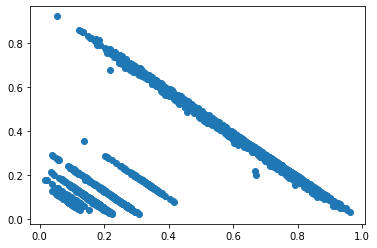

In [109]:
fig,ax=plt.subplots()
ax.scatter(features_model['Vote Republican'],features_model['Vote Democrat'])
plt.show()

The data containing the K-means clusters and the data containing possible explanatory variables are merged.

In [110]:
features_clusters=pd.merge(features_model,clusters_kmeans,on='fips',how='inner').dropna()

We can use a pipeline to first use a standardscaler and use a logistic regression model afterwards.

In [111]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', my_regression.logistic_model()),
        ])

In [112]:
column_names=['intercept','Vote Republican','Vote Democrat','pagerank score','pop_density','PovertyRate','median_age_2019','Life expectancy','uninsured_2019','Airports','median_individual_income_2019']
X=features_clusters[[x for x in column_names if x != 'intercept']]
y=features_clusters['cluster'].astype('float')
pipe.fit(X,y)
print(pipe.named_steps['regressor'].result.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.433334
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                cluster   No. Observations:                 2799
Model:                          Logit   Df Residuals:                     2788
Method:                           MLE   Df Model:                           10
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.3625
Time:                        11:22:28   Log-Likelihood:                -1212.9
converged:                       True   LL-Null:                       -1902.6
Covariance Type:            nonrobust   LLR p-value:                2.667e-290
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                        -0.5091      0.052     -9.715      0.